# 1

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
file_path = 'framingham.csv'
framingham_data = pd.read_csv(file_path)

framingham_data.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


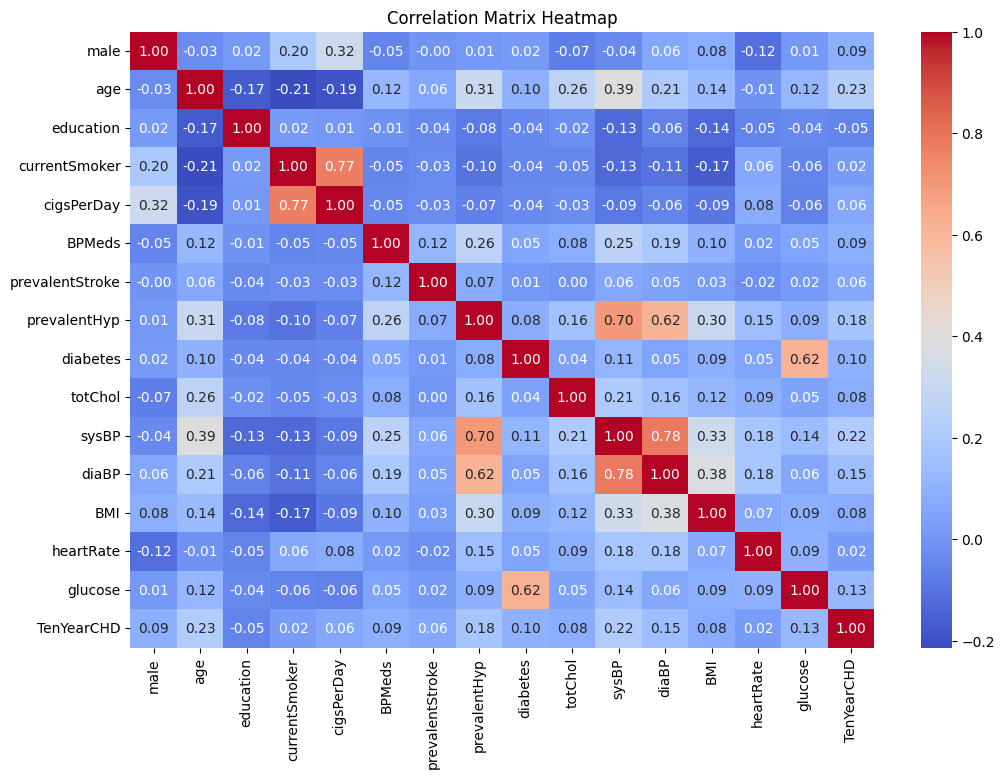

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = framingham_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()


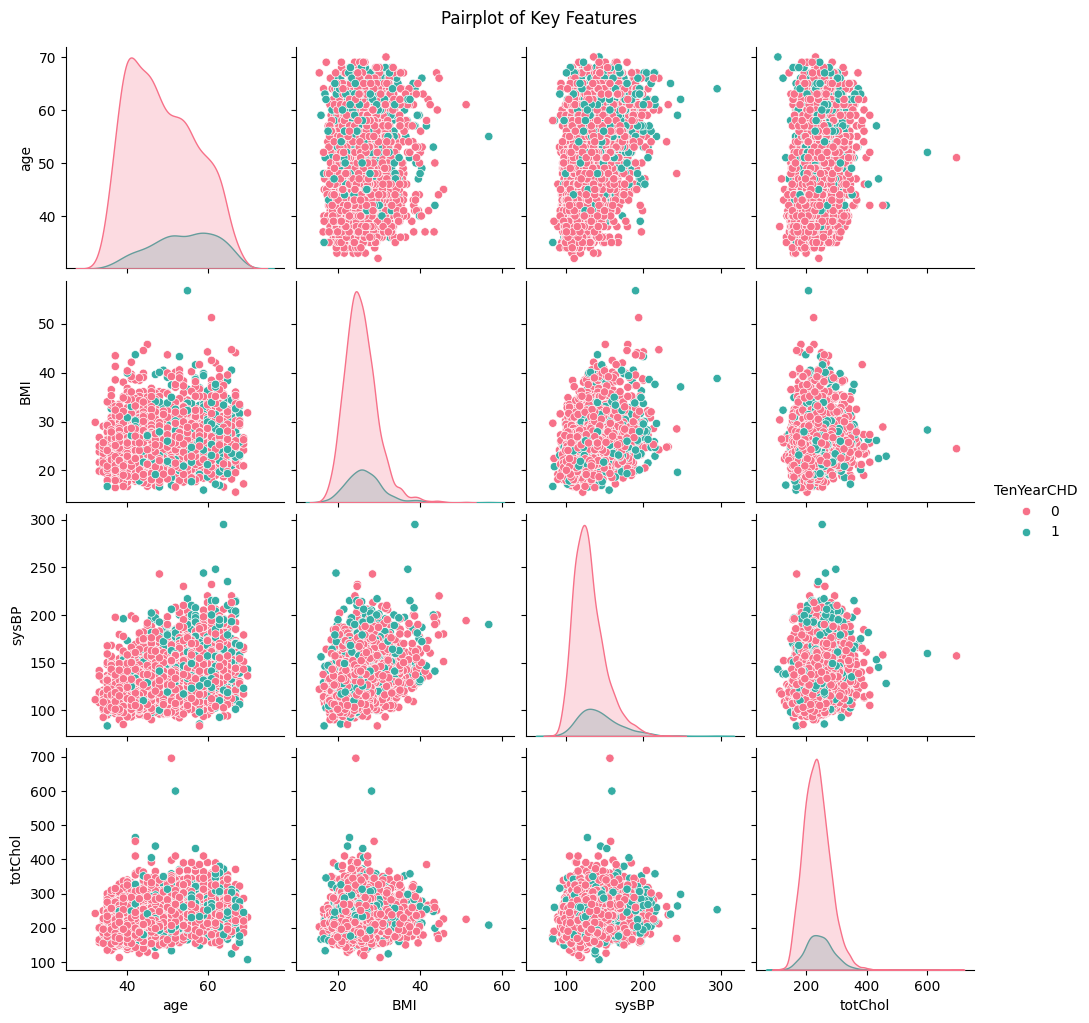

In [ ]:
key_features = ['age', 'BMI', 'sysBP', 'totChol', 'TenYearCHD']

sns.pairplot(framingham_data[key_features], hue="TenYearCHD", palette="husl", diag_kind="kde")
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()


In [ ]:
features_to_drop = ['education']
framingham_data_cleaned = framingham_data.drop(columns=features_to_drop)

In [ ]:
imputer = SimpleImputer(strategy="mean")
framingham_data_imputed = pd.DataFrame(imputer.fit_transform(framingham_data_cleaned), columns=framingham_data_cleaned.columns)

In [ ]:
X = framingham_data_imputed.drop(columns=['TenYearCHD'])
y = framingham_data_imputed['TenYearCHD']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8561320754716981